In [41]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

def set_korean_font():
    system = platform.system()
    if system == 'Windows':
        plt.rc('font', family='Malgun Gothic')
    elif system == 'Darwin':  # macOS
        plt.rc('font', family='AppleGothic')
    else:
        # 리눅스: 나눔고딕 또는 DejaVuSans (설치 필요시)
        font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
        if fm.findSystemFonts(fontpaths=[font_path]):
            plt.rc('font', family='NanumGothic')
        else:
            plt.rc('font', family='DejaVu Sans')  # fallback

    plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

set_korean_font()

### 데이터 가져오기

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import os

all_df = pd.read_csv("ts2000_y_winsorized.csv", dtype={'stock_code': str, 'year': str})
# df['year'] = pd.to_datetime(df['year'], format='%Y').dt.year
all_df.drop(['Unnamed: 0'], axis=1, inplace=True)
all_df.head()


,corp_nm,stock_code,year,자산총계_당기,자산총계_전기,비유동자산_당기,비유동자산_전기,유동자산_당기,유동자산_전기,자본총계_당기,...,당기순이익_전기,재고자산_당기,재고자산_전기,매출채권_당기,매출채권_전기,매출채권및기타유동채권_당기,매출채권및기타유동채권_전기,총현금흐름_당기,총현금흐름_전기,is_defaulted
0,(주)CMG제약,58820.0,2015,56591972.0,58127098.0,30261207.0,29767275.0,26330765.0,28359823.0,46872705.0,...,171502.0,5455617.0,4913103.0,15838056.0,16787073.0,12405117.0,13533700.0,-6259636.0,-12880662.0,0
1,(주)CMG제약,58820.0,2016,110979867.0,56591972.0,32207666.0,30261207.0,78772201.0,26330765.0,101107635.0,...,-3648668.0,6393756.0,5455617.0,14435808.0,15838056.0,12748287.0,12405117.0,-413245.0,-6259636.0,0
2,(주)CMG제약,58820.0,2017,109568153.0,110979867.0,28340823.0,32207666.0,81227330.0,78772201.0,97944019.0,...,1693463.0,7904518.0,6393756.0,16768648.0,14435808.0,15507312.0,12748287.0,1652143.0,-413245.0,0
3,(주)CMG제약,58820.0,2018,114379880.0,109568153.0,33009465.0,28340823.0,81370415.0,81227330.0,103981846.0,...,2834901.0,8572582.0,7904518.0,19030822.0,16768648.0,17706490.0,15507312.0,9665998.0,1652143.0,0
4,(주)CMG제약,58820.0,2019,192243166.0,114379880.0,41659100.0,33009465.0,150584066.0,81370415.0,180158283.0,...,6065026.0,9048933.0,8572582.0,21676515.0,19030822.0,21160960.0,17706490.0,5105725.0,9665998.0,0


In [58]:
# 'is_defaulted'가 1인 행 중, 결측치가 하나라도 있는 데이터 추출
missing_in_defaulted = all_df.loc[((all_df['is_defaulted'] == 1) & (all_df.isnull().any(axis=1)))]
missing_in_defaulted

,corp_nm,stock_code,year,자산총계_당기,비유동자산_당기,유동자산_당기,자본총계_당기,자본금_당기,이익잉여금_당기,부채총계_당기,...,매출총이익_당기,판매관리비_당기,영업이익_당기,매출원가_당기,당기순이익_당기,재고자산_당기,매출채권_당기,매출채권및기타유동채권_당기,총현금흐름_당기,is_defaulted
21812,에스앤씨엔진그룹리미티드,900080.0,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
21815,완리인터내셔널홀딩스,900180.0,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
21821,중국원양자원유한공사,900050.0,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
21824,차이나그레이트스타인터내셔널리미티드,900040.0,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
21825,차이나하오란리사이클링유한공사,900090.0,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


,corp_nm,stock_code,year,자산총계_당기,비유동자산_당기,유동자산_당기,자본총계_당기,자본금_당기,이익잉여금_당기,부채총계_당기,...,매출총이익_당기,판매관리비_당기,영업이익_당기,매출원가_당기,당기순이익_당기,재고자산_당기,매출채권_당기,매출채권및기타유동채권_당기,총현금흐름_당기,is_defaulted
21740,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21741,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21742,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21743,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21744,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21828,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21829,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21830,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
all_df['is_defaulted'].value_counts()

is_defaulted
0    21740
1       93
Name: count, dtype: int64

In [44]:
numeric_df = all_df.select_dtypes(include=[np.number])
target = numeric_df[['is_defaulted']]
features = numeric_df.drop(['is_defaulted'], axis=1)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21833 entries, 0 to 21832
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   자산총계_당기         21828 non-null  float64
 1   자산총계_전기         21828 non-null  float64
 2   비유동자산_당기        21828 non-null  float64
 3   비유동자산_전기        21828 non-null  float64
 4   유동자산_당기         21828 non-null  float64
 5   유동자산_전기         21828 non-null  float64
 6   자본총계_당기         21828 non-null  float64
 7   자본총계_전기         21828 non-null  float64
 8   자본금_당기          21828 non-null  float64
 9   자본금_전기          21828 non-null  float64
 10  이익잉여금_당기        21828 non-null  float64
 11  이익잉여금_전기        21828 non-null  float64
 12  부채총계_당기         21828 non-null  float64
 13  부채총계_전기         21828 non-null  float64
 14  비유동부채_당기        21828 non-null  float64
 15  비유동부채_전기        21828 non-null  float64
 16  유동부채_당기         21828 non-null  float64
 17  유동부채_전기         21828 non-null 

In [45]:
# '_전기'로 끝나는 컬럼명 리스트 생성
cols_to_drop = [col for col in all_df.columns if col.endswith('_전기')]
# 컬럼 제거
all_df_no_prev = all_df.drop(columns=cols_to_drop)
all_df = all_df_no_prev.copy()

### 결측치 확인 (완전 처음)

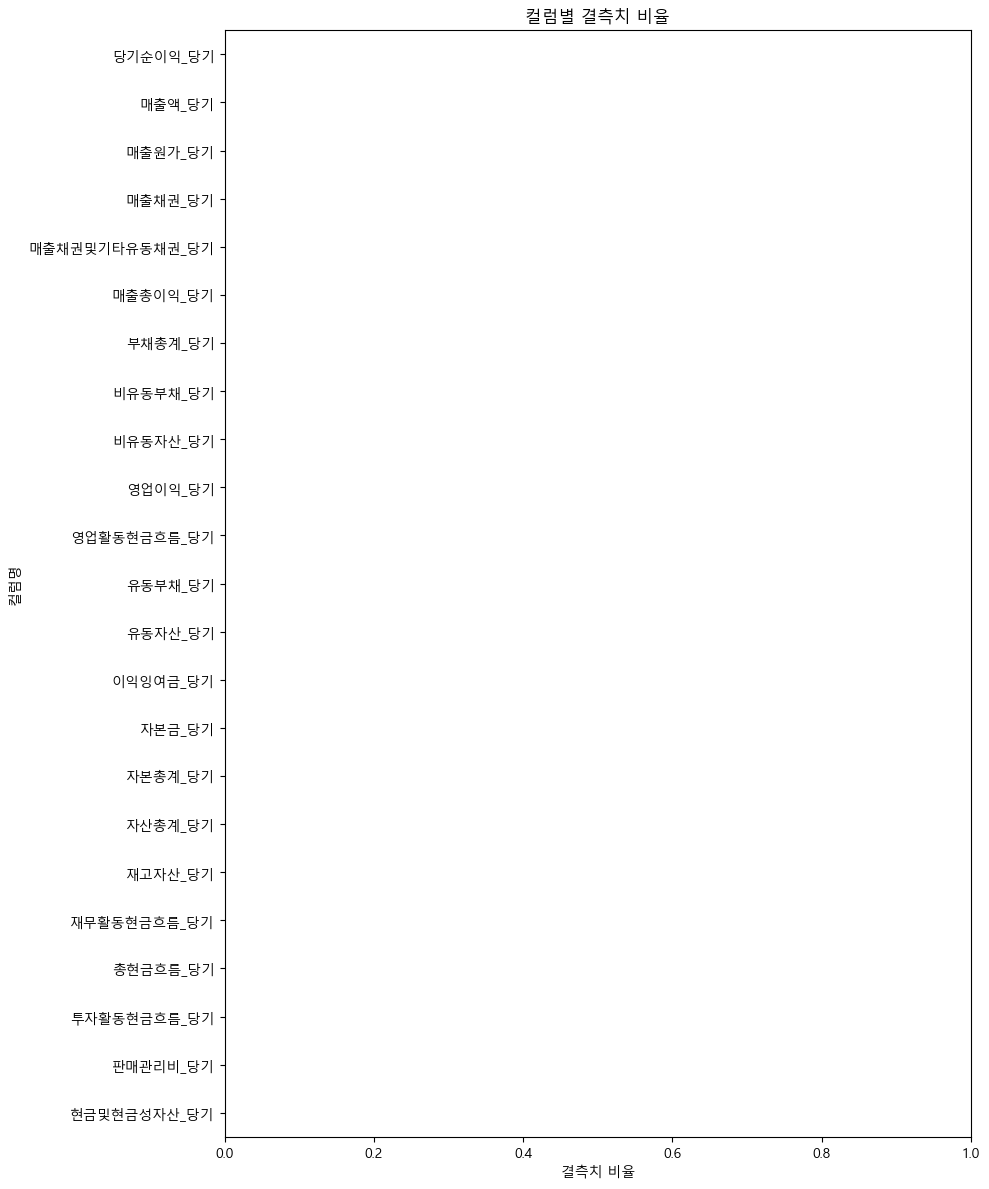

In [46]:
missing_ratio = all_df.isnull().mean().sort_values(ascending=False)
missing_df = pd.DataFrame({'결측치비율': missing_ratio, '결측치수': all_df.isnull().sum()})
missing_df = missing_df[missing_df['결측치수'] > 0]

plt.figure(figsize=(10, 12))
sns.barplot(y=missing_df.index, x=missing_df['결측치비율'])
plt.title('컬럼별 결측치 비율')
plt.xlabel('결측치 비율')
plt.ylabel('컬럼명')
plt.xlim(0, 1)  # x축을 0~1(0~100%)로 고정
plt.tight_layout()
plt.show()

### 4. t-test(정상 vs 부실 그룹 비교)

In [47]:
import scipy.stats as stats

# 정상 vs 부실 그룹
group_0 = all_df[all_df['is_defaulted'] == 0]
group_1 = all_df[all_df['is_defaulted'] == 1]

# 예시: col 차이 검정 !!! 바꿔야함
for col in all_df.columns[3:-1]:
    t_stat, p_val = stats.ttest_ind(group_0[col].dropna(), group_1[col].dropna(), equal_var=False)
    print(f"t-test 결과 {col}: t={t_stat:.4f}, p={p_val:.4f}")


t-test 결과 자산총계_당기: t=5.5066, p=0.0000
t-test 결과 비유동자산_당기: t=4.1424, p=0.0001
t-test 결과 유동자산_당기: t=11.0875, p=0.0000
t-test 결과 자본총계_당기: t=16.5308, p=0.0000
t-test 결과 자본금_당기: t=-0.3789, p=0.7056
t-test 결과 이익잉여금_당기: t=8.8611, p=0.0000
t-test 결과 부채총계_당기: t=1.9615, p=0.0529
t-test 결과 비유동부채_당기: t=1.8665, p=0.0652
t-test 결과 유동부채_당기: t=1.7628, p=0.0814
t-test 결과 현금및현금성자산_당기: t=9.6407, p=0.0000
t-test 결과 영업활동현금흐름_당기: t=5.3853, p=0.0000
t-test 결과 투자활동현금흐름_당기: t=-6.1833, p=0.0000
t-test 결과 재무활동현금흐름_당기: t=0.6239, p=0.5343
t-test 결과 매출액_당기: t=3.3023, p=0.0014
t-test 결과 매출총이익_당기: t=13.4791, p=0.0000
t-test 결과 판매관리비_당기: t=10.6013, p=0.0000
t-test 결과 영업이익_당기: t=11.4234, p=0.0000
t-test 결과 매출원가_당기: t=2.3162, p=0.0228
t-test 결과 당기순이익_당기: t=7.5740, p=0.0000
t-test 결과 재고자산_당기: t=8.4900, p=0.0000
t-test 결과 매출채권_당기: t=6.7279, p=0.0000
t-test 결과 매출채권및기타유동채권_당기: t=7.1923, p=0.0000
t-test 결과 총현금흐름_당기: t=1.6955, p=0.0935


### 5. 부도

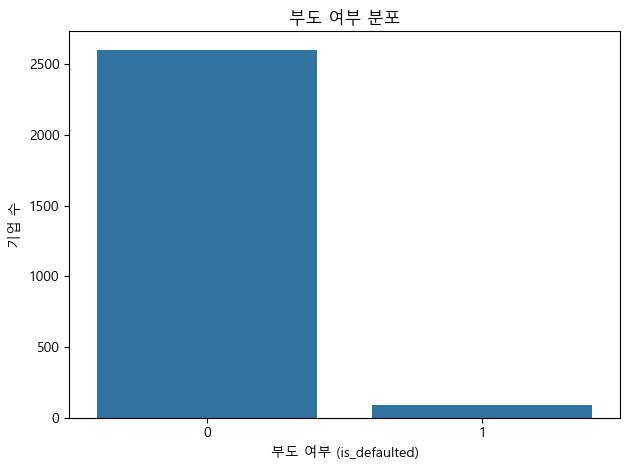

In [48]:
grouped_company = (
    all_df.sort_values(['corp_nm', 'year'])
      .groupby('corp_nm', as_index=False)
      .tail(1)[['corp_nm', 'year', 'is_defaulted']]
)
sns.countplot(data=grouped_company, x='is_defaulted')
plt.title('부도 여부 분포')
plt.xlabel('부도 여부 (is_defaulted)')
plt.ylabel('기업 수')
plt.tight_layout()
plt.show()


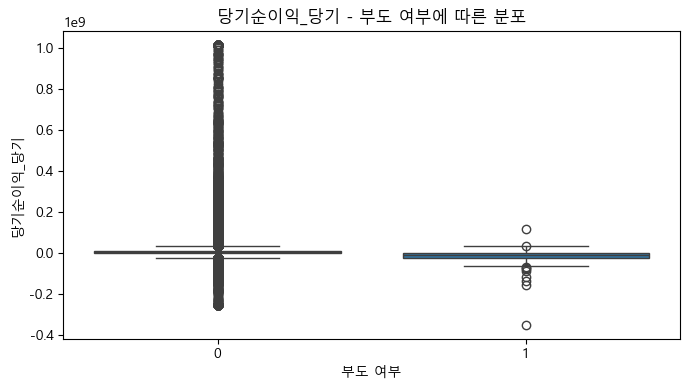

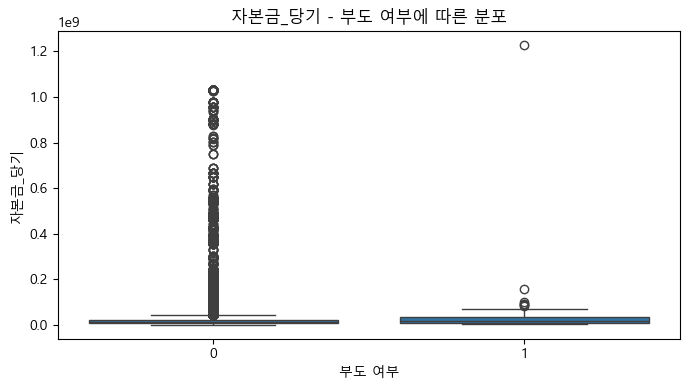

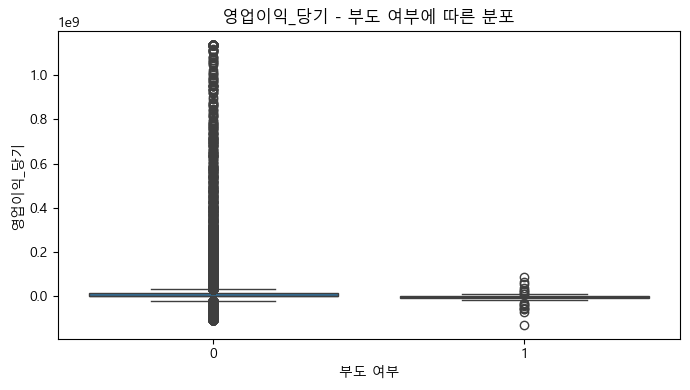

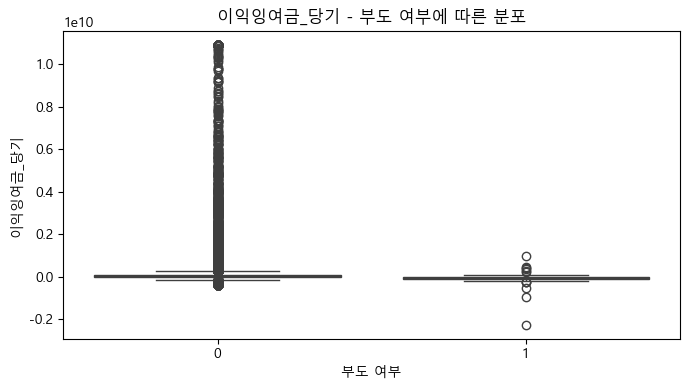

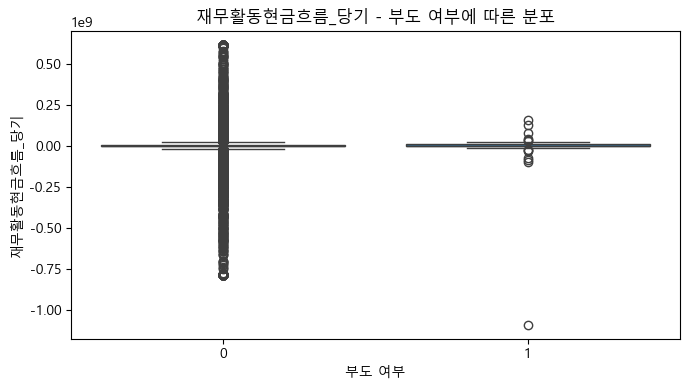

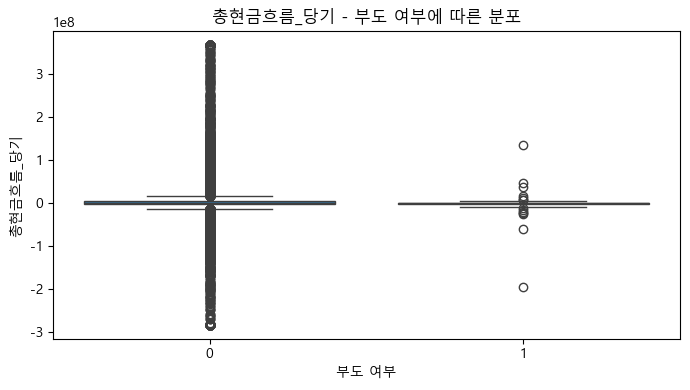

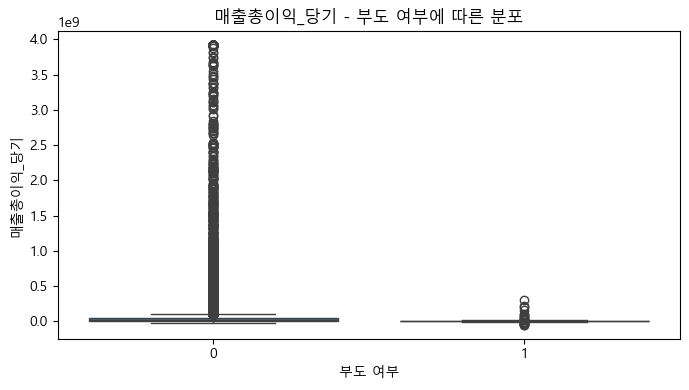

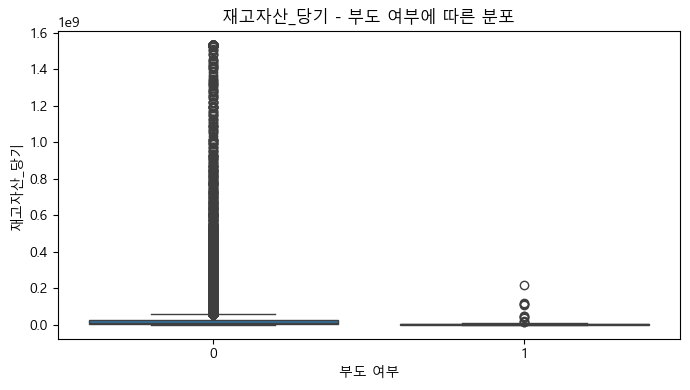

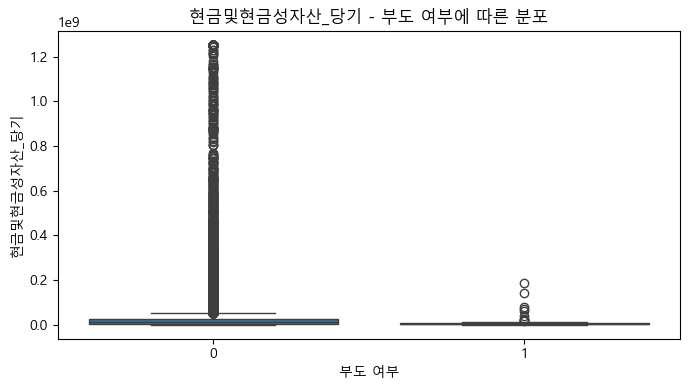

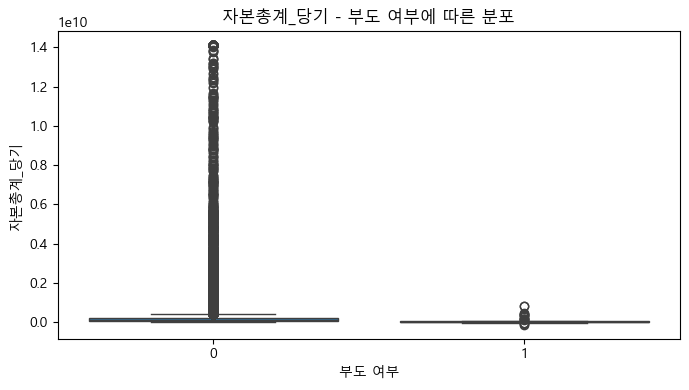

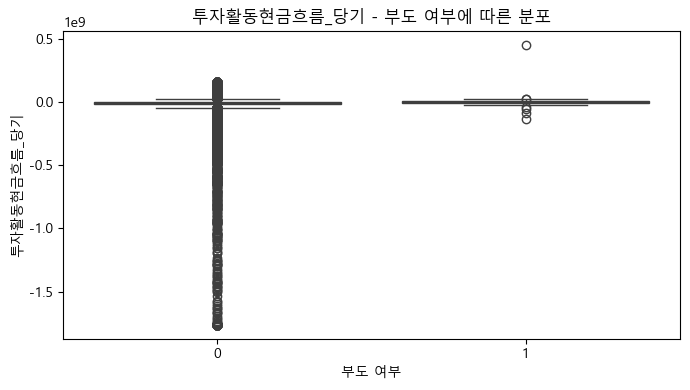

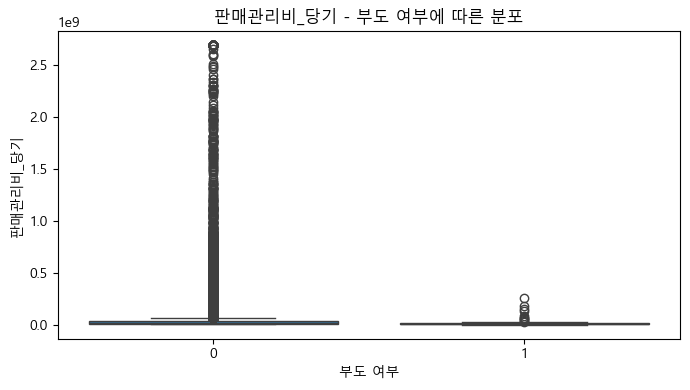

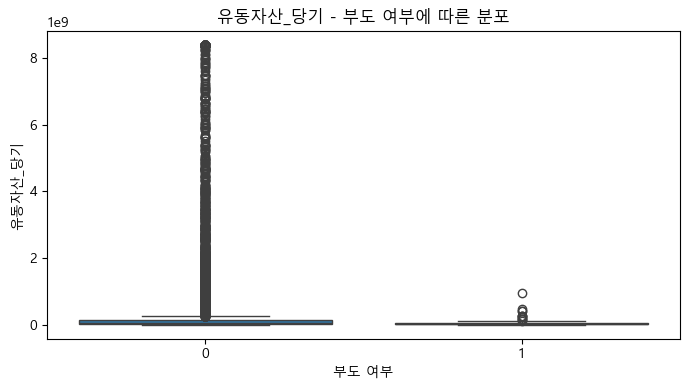

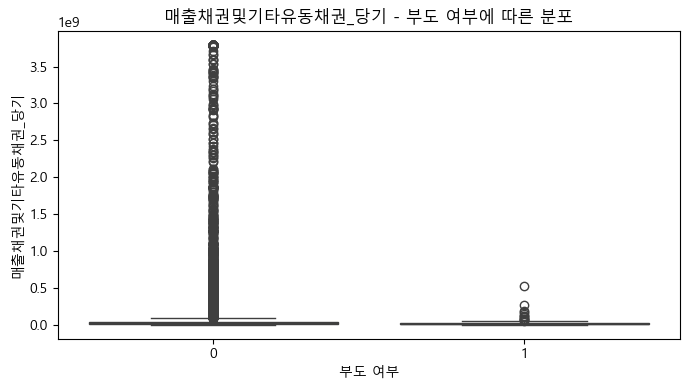

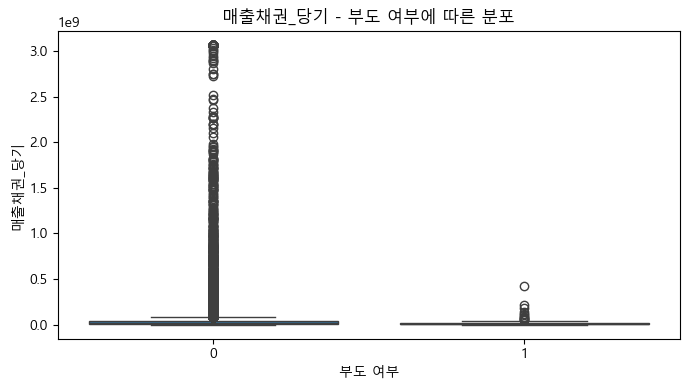

In [49]:
top_features = top_corr.index.tolist()

for feature in top_features:
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=all_df, x='is_defaulted', y=feature)
    plt.title(f'{feature} - 부도 여부에 따른 분포')
    plt.xlabel('부도 여부')
    plt.ylabel(feature)
    # y축 범위 제한 없이 이상치까지 모두 보이게
    plt.tight_layout()
    plt.show()

### 상관관계가 높은 변수

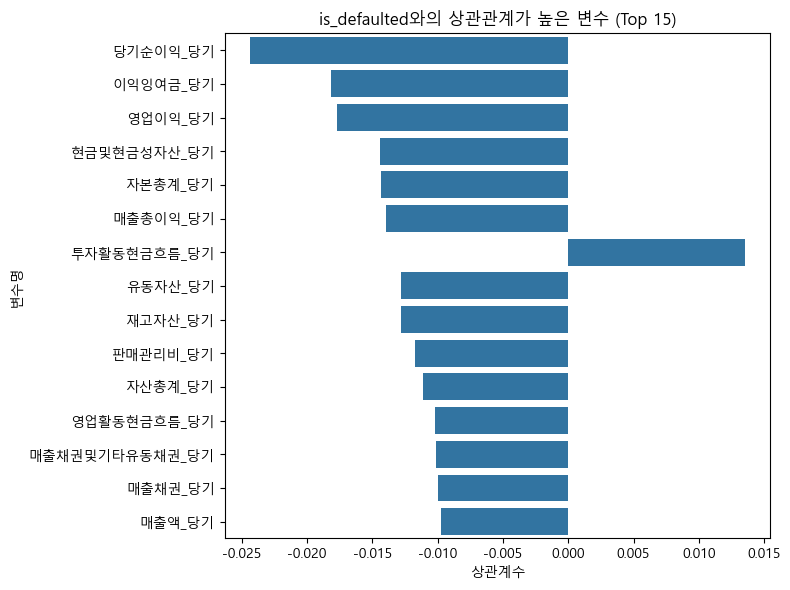

In [50]:
numeric_df = all_df.select_dtypes(include=[np.number])
correlations = numeric_df.corr(numeric_only=True)['is_defaulted'].sort_values(key=lambda x: abs(x), ascending=False)
correlation_df = correlations.to_frame(name='상관계수')

top_corr = correlation_df.iloc[1:16]
plt.figure(figsize=(8, 6))
sns.barplot(x=top_corr['상관계수'], y=top_corr.index)
plt.title('is_defaulted와의 상관관계가 높은 변수 (Top 15)')
plt.xlabel('상관계수')
plt.ylabel('변수명')
plt.tight_layout()
plt.show()

### 5. 다중공선성

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 다중공선성 확인을 위한 VIF 계산
X = numeric_df.drop(columns=['is_defaulted'])  # 타겟 컬럼 제외
# X = X.dropna()  # 결측치 제거

vif_data = pd.DataFrame()
vif_data['변수명'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values('VIF', ascending=False))

MissingDataError: exog contains inf or nans